Say hello!

Ask about the homework? Has anyone worked on it? If so, how is it going? We'll look at my solution next time.

Introduce today's class: Monte carlo integration as a way to introduce functions.

In [2]:
# What's a function? You've seen it before
1 + 1

[1] 2

In [4]:
# Or more abstract functions
typeof(1)

[1] "double"

In [5]:
# We can define our own functions in R
add <- function(a, b){
    return(a + b)
}

In [6]:
add(1, 1)

[1] 2

In [8]:
# You can see the code of a function by using the following
add

function(a, b){
    return(a + b)
}

In [10]:
###########################3
# Documentation

# I've talked before about documentation, but let's be more
# rigorous

# why? Let's say we define the following function
whereis <- function(pattern, word){
    return(grep(pattern, word))
}
whereis('I', 'Im lost')

[1] 1

In [11]:
# First of all, what do you think whereis is doing?

# Can we find help documentation on this function?
?whereis

No documentation for ‘whereis’ in specified packages and libraries:
you could try ‘??whereis’

In [13]:
# But it is simply a wrapper of another function
?grep

grep {base},R Documentation
pattern,"character string containing a regular expression (or character string for fixed = TRUE) to be matched in the given character vector. Coerced by as.character to a character string if possible. If a character vector of length 2 or more is supplied, the first element is used with a warning. Missing values are allowed except for regexpr and gregexpr."
"x, text","a character vector where matches are sought, or an object which can be coerced by as.character to a character vector. Long vectors are supported."
ignore.case,"if FALSE, the pattern matching is case sensitive and if TRUE, case is ignored during matching."
perl,logical. Should Perl-compatible regexps be used?
value,"if FALSE, a vector containing the (integer) indices of the matches determined by grep is returned, and if TRUE, a vector containing the matching elements themselves is returned."
fixed,"logical. If TRUE, pattern is a string to be matched as is. Overrides all conflicting arguments."
useBytes,logical. If TRUE the matching is done byte-by-byte rather than character-by-character. See ‘Details’.
invert,logical. If TRUE return indices or values for elements that do not match.
replacement,"a replacement for matched pattern in sub and gsub. Coerced to character if possible. For fixed = FALSE this can include backreferences ""\1"" to ""\9"" to parenthesized subexpressions of pattern. For perl = TRUE only, it can also contain ""\U"" or ""\L"" to convert the rest of the replacement to upper or lower case and ""\E"" to end case conversion. If a character vector of length 2 or more is supplied, the first element is used with a warning. If NA, all elements in the result corresponding to matches will be set to NA."


In [18]:
# Documentation allows you to look up what the function does
# and how it works.

# To that end, we will use documentation in this course
# rigorously, or at least you will and I will avoid it so I can
# ask you to do it for homework

# There are two ways to approach this problem: personal style
# or roxygen.

# Personally I use a pythonic documentation style
whereis <- function(pattern, word){
    # A function to find the first index of a pattern in a
    # string.
    #
    # Parameters
    # ----------
    #    pattern    :    character; the pattern to find
    #    word       :    character; the phrase in which to search
    #
    # Returns
    # ----------
    #               :    double; the index of the first occurance
    return(grep(pattern, word))
}

# The other way to do your documentation is to look ahead to
# how you'll need to deal with it when you build help docs.
# In particular, my documentaiton will provide no output from
# ?whereis. There is a package called roxygen which builds
# documentation files for you if you put your documentation
# in the correct format

#' A function to find the first index of a pattern in a string.
#'
#' @param pattern String: a pattern
#' @param word String: a string
#' @return The index
#' @seealso \code{\link{grep}}
#' @export
whereis <- function(pattern, word){
    return(grep(pattern, word))
}

# When you build a package later this will be converted into
# a help document that allows you to query ?whereis. I
# encourage you to follow this standard, but understand if
# you choose to follow another one. In any case, practice using
# documentation so you don't struggle in the future!

In [40]:
# Now let's move back to our problem. The first thing we should
# do is break down the problem into steps, what do we need to
# do in the most fundamental sense?

#### Write pseudo code on the board

# Start from the sum and show different ways of calculating it
x <- rep(1, 10)

summation <- 0
for(i in 1:length(x)){
    summation <- summation + x[i]
}

summation <- 0
i <- 1
while(i <= length(x)){
    summation <- summation + x[i]
    i <- i + 1
}

summation <- 0
for(i in x){
    summation <- summation + i
}

sum(x)

[1] 10

In [41]:
# Let's write a function to calculate our sum
our_sum <- function(x){
    summation <- 0
    for(i in x){
        summation <- summation + i
    }
    return(summation)
}

In [45]:
# NOw let's time our function!

# NOTE: dont go above 1e6 which takes 0.4, 40 respectively
x <- rep(1, 1e6)

system.time(sum(x))
system.time(our_sum(x))

   user  system elapsed 
  0.364   0.000   0.367 

   user  system elapsed 
 40.340   0.008  40.349 

In [47]:
################
# Data types

# Now what happens when we put differnt data types into our function?
# what do I mean by "different data types"?

In [48]:
typeof(1)
typeof(1.0)
typeof("hello")
typeof(T)

[1] "double"

[1] "double"

[1] "character"

[1] "logical"

In [50]:
# can we sum a string?
our_sum("a string")

ERROR: Error in summation + i: non-numeric argument to binary operator


In [51]:
# can we sum a vector of booleans?
our_sum(c(T, T))

[1] 2

In [52]:
# It is important to know how functions deal with data types

# When you pass a function variables, these are called
# arguments. They take two types in R: Positional arguments and
# Default arguments (otherwise known as keyword arguments)

# Let's write a function to take a random sample... how would
# you do this? What arguments should the function take?

sample <- function(n, F_inv=function(x) x){
    unif_sample <- runif(n)
    return(F_inv(unif_sample))
}

In [55]:
sample(5)

[1] 0.03036559 0.64414827 0.56567697 0.56568677 0.33228646

In [59]:
# Can you describe what this function does? what are its
# arguments? what kind of data types does it expect?

# Demonstrate different ways to call this function
sample(5)

F_inv_unif <- function(x, a, b) x*(b - a) + a
sample(5, function(x) F_inv_unif(x, 0, 10))

sample(n=5)

sample(5, F_inv=function(x) F_inv_unif(x, 0, 10))

[1] 0.2543543 0.8855104 0.9244243 0.5919564 0.5095316

[1] 9.1777721 2.8586129 9.6929773 0.8120223 5.8274509

[1] 0.9713914 0.4644050 0.1265752 0.5163794 0.2467029

[1] 5.4865863 8.6811381 9.4510289 0.1338864 6.9962532

In [62]:
# It is also important to keep in mind the name space
# what is the namespace? it is the area where a variable lives
# Global versus local

f <- function(x){
    func_var <- "I'm local"
    print(func_var)
}
f(1.0)

# what happens if you try to call the local variable?
#func_var

[1] "I'm local"


In [63]:
# what if you define a variable outside of the function?

glob_var <- "Im global"
f <- function(x){
    func_var <- "Im local"
    print(glob_var)
}
f(1.0)


[1] "Im global"


In [65]:
# why does this work? what happens if we try to change the
# global variable?
glob_var <- "Im global"
print(glob_var)
f <- function(x){
    glob_var <- "Im local"
    print(glob_var)
}
f(1.0)
print(glob_var)

[1] "Im global"
[1] "Im local"
[1] "Im global"


In [68]:
############################3
# Nesting functions

# any time you call a built in function inside a user function
# you are essentially nesting functions

# Let's use our random sample function inside of a function to
# calculate the mean
sample <- function(n, F_inv=function(x) x){
    unif_sample <-  runif(n)
    return(F_inv(unif_sample))
}
                   
mc_mean <- function(n, F_inv=function(x) x){
    X <- sample(n, F_inv=function(x) F_inv(x))
    return(sum(X)/n)
}

In [70]:
mc_mean(1)
mc_mean(10)
mc_mean(100)

[1] 0.5069684

[1] 0.3699368

[1] 0.4876164

In [72]:
# Let's nest this again to the results for some vector of n's
sample <- function(n, F_inv=function(x) x){
    unif_sample <-  runif(n)
    return(F_inv(unif_sample))
}
                   
mc_mean <- function(n, F_inv=function(x) x){
    X <- sample(n, F_inv=function(x) F_inv(x))
    return(sum(X)/n)
}

plot_results <- function(n_vec, F_inv=function(x) x){
    results <- rep(0, length(n_vec))
    i <- 1
    for(n in n_vec){
        results[i] <- mc_mean(n)
        i <- i + 1
    }
    plot(n_vec, results, type="l")
}

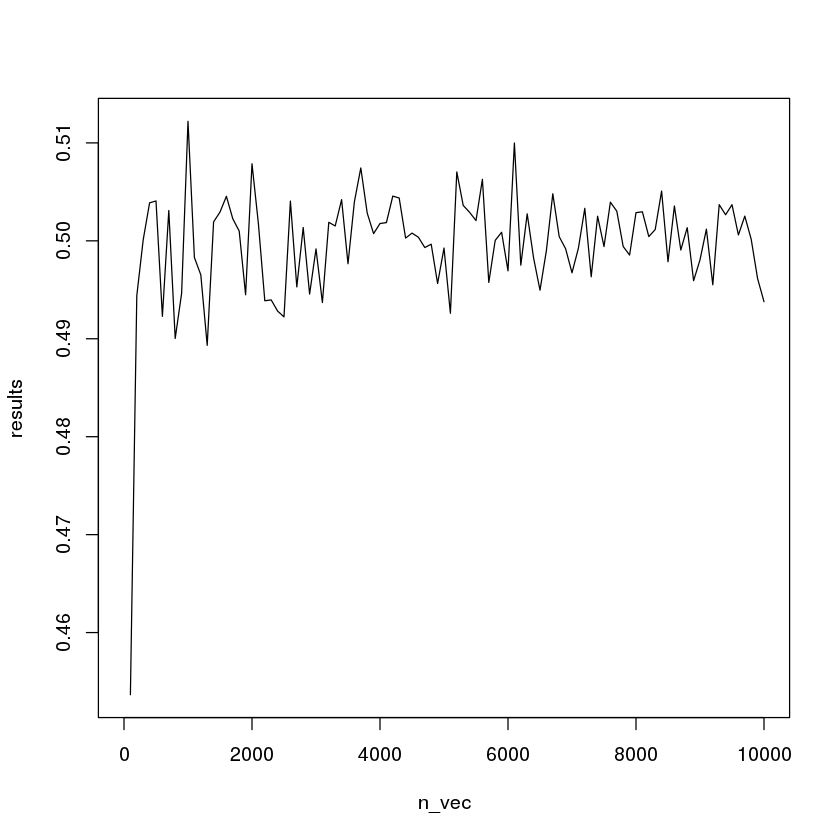

In [74]:
N <- seq(0, 10000, 100)
plot_results(N)

In [75]:
###########################
# That's it! we've done it!